In [1]:
import tensorflow 

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

In [2]:
print("Tensorflow-version:", tensorflow.__version__)

Tensorflow-version: 2.4.1


In [3]:
model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(256, 256, 3)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(4,activation='softmax')(x) #FC-layer

29089792/29084464 [==============================] - 0s 0us/step


In [4]:
model=Model(inputs=model_d.input,outputs=preds)
#model.summary()

In [5]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True

In [6]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
#model.summary()

In [7]:
trdata = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

tsdata = ImageDataGenerator(rescale = 1./255)
traindata = trdata.flow_from_directory(directory="../input/cotton-disease-dataset/Cotton Disease/train",target_size=(256,256),batch_size = 32,
                                                 class_mode = 'categorical')
testdata = tsdata.flow_from_directory(directory="../input/cotton-disease-dataset/Cotton Disease/test", target_size=(256,256),batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [8]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("densenet.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

history = model.fit_generator( traindata,validation_data=testdata,epochs=20,callbacks=[checkpoint,early])

Epoch 1/20
61/61 [==============================] - 61s 851ms/step - loss: 0.9600 - accuracy: 0.6804 - val_loss: 0.3171 - val_accuracy: 0.9151
Epoch 2/20
61/61 [==============================] - 38s 617ms/step - loss: 0.3720 - accuracy: 0.8851 - val_loss: 0.2725 - val_accuracy: 0.9151
Epoch 3/20
61/61 [==============================] - 37s 609ms/step - loss: 0.2854 - accuracy: 0.9095 - val_loss: 0.2024 - val_accuracy: 0.9623
Epoch 4/20
61/61 [==============================] - 37s 608ms/step - loss: 0.2818 - accuracy: 0.9044 - val_loss: 0.2071 - val_accuracy: 0.9245
Epoch 5/20
61/61 [==============================] - 37s 607ms/step - loss: 0.2245 - accuracy: 0.9241 - val_loss: 0.1855 - val_accuracy: 0.9528
Epoch 6/20
61/61 [==============================] - 37s 610ms/step - loss: 0.2474 - accuracy: 0.9222 - val_loss: 0.1180 - val_accuracy: 0.9623
Epoch 7/20
61/61 [==============================] - 37s 602ms/step - loss: 0.1949 - accuracy: 0.9285 - val_loss: 0.1724 - val_accuracy: 0.9528

In [9]:
accuracy = model.evaluate(testdata)

print('Test set accuracy:', accuracy[1]*100)

4/4 [==============================] - 4s 793ms/step - loss: 0.0788 - accuracy: 0.9717
Test set accuracy: 97.16981053352356


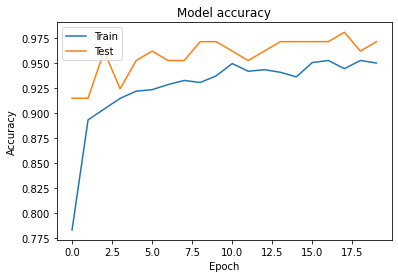

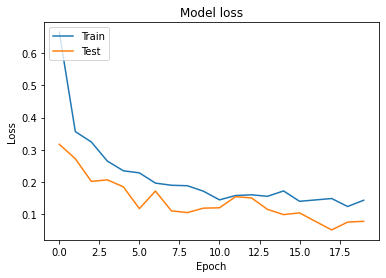

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()